# **Project Explanation**

<hr>

1. **What is census?**

**A census is the process of gathering, compiling, and distributing demographic, economic, and social data relevant to all citizens of a nation or geographically defined area of a country at a given period. Some countries often include a housing census in a census count. It is a method for gathering, compiling, and distributing data about buildings, houses, and amenities like sewage systems, restrooms, electricity, etc.**

<hr>

2. **What is Census Income?**

**Adult Census Income Prediction is the task of predicting an individual's income level based on their demographic and socioeconomic characteristics. This is typically done using machine learning algorithms trained on large census income data sets. It involves developing ML models that can accurately predict an individual's income level, which can be useful for various applications such as targeted marketing, credit risk assessment, and public policy analysis.**

<hr>

3. **Information?**

**The census income dataset is highly significant as it provides valuable information on economic trends and income distribution. Several businesses, government agencies, and non-profit organizations use this data to assess risk and develop targeted marketing strategies. The census income dataset is valuable for analyzing income inequality and developing policies for boosting economic growth and minimizing poverty.**



<hr>

# **Census Income Dataset Understanding**

**A good grasp of the dataset's structure, variables, and meanings provides a solid foundation for analysis and modeling in any data science project.**

**Dataset Explanation:**

1. **Age: Age of the individual.**

2. **Workclass: The type of work the individual is engaged in (e.g., private, self-employed, government).**

3. **Final Weight: A weight assigned to each observation for survey analysis purposes.**

4. **Education: The highest level of education completed by the individual.**

5. **Education Number of Years: The number of years of education completed.**

6. **Marital-status: The marital status of the individual.**

7. **Occupation: The occupation of the individual.**

8. **Relationship: The relationship of the individual to the household.**

9. **Race: The race of the individual.**

10. **Sex: The gender of the individual.**

11. **Capital-gain: Capital gains earned by the individual.**

12. **Capital-loss: Capital losses incurred by the individual.**

13. **Hours-per-week: The number of hours worked per week.**

14. **Native-country: The country of origin of the individual.**

<hr>

**Target: Income and it's a classification problem**

<hr>

# **Starting**

<hr>

# **Step 1 - Import the necessary libraries**

**1. Configuration Libraries**

In [168]:
import warnings
warnings.filterwarnings('ignore')

**2. Mandatory Libraries**

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**3. Machine Learning Libraries**

In [225]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**4. Imputation and Tranformer Libraries**

In [171]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

<hr>

# **Step 2 - Data Loading and Inspection**

In [172]:
df = pd.read_csv('/content/census-income.csv', na_values = '?', skipinitialspace = True)

In [173]:
df.head().style.set_properties(
    **{
        'background-color':'red',
        'color':'white',
        'border-color':'white',
        'border-style':'solid'
    }
)

**Here, there are few question marks in the dataset, that needs to removed. Since, we don't have a clear picture with what to replace, we will replace them NaN values.**

**Insights**

1. Target Columns: `annual_income`
2. Categorical Values, Encoding
3. Null Values, imputation

**Shape Inspection**

In [174]:
a = df.shape
print(f'The rows are {a[0]} and the columns are {a[1]}')

The rows are 32561 and the columns are 15


**Information Gathering on the dataset**

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Insights**

1. Most of the columns are categorical in nature
2. There are three columns that are having null values
3. All the three columns that are having null values are categorical nature

**Statistical Summary**

In [176]:
df.describe().T.style.set_properties(
    **{
        'background-color':'blue',
        'color':'white',
        'border-color':'white',
        'border-style':'solid'
    }
)

**Insights:**

1. The average number of years a person has is around 10 (mean & median). It's a normal distribution.

2. The average age in the 38.5, median is 37, assuming that it's a normal distribution


In [177]:
df.describe(include = 'O').T.style.set_properties(
    **{
        'background-color':'blue',
        'color':'white',
        'border-color':'white',
        'border-style':'solid'
    }
)

**Insights**
1. **We got the values that are needed to filled in the null values**

<hr>

# **Step 3 - Data Cleaning**

**Null values treatment**

In [178]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

**Choices of Operation**
1. **Either we can drop the values**
2. **Either impute them**

**Columns check**

In [179]:
# check for occupation columns
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [180]:
# check for unique values
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [181]:
# check for occupation columns
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [182]:
# check for unique values
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [183]:
# check for occupation columns
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [184]:
# check for unique values
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

**Shape Check**

In [185]:
a = df.shape
print(f'The rows are {a[0]} and the columns are {a[1]}')

The rows are 32561 and the columns are 15


**Concept of Imputer and Column Transformer**

Process 1: dividing

In [186]:
# for numerical values
num_feat = df.select_dtypes(exclude = ['object']).columns

# for categorical values
cat_feat = df.select_dtypes(include = ['object']).columns

In [187]:
num_feat

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [188]:
cat_feat

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'annual_income'],
      dtype='object')

Process 2 - Imputation

In [189]:
# for the numerical values
num_feat_transformer = SimpleImputer(strategy = 'mean')

# for the numerical values
cat_feat_transformer = SimpleImputer(strategy = 'most_frequent')

Process 3 - Setup

In [190]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_feat_transformer, num_feat),
        ('cat', cat_feat_transformer, cat_feat),
    ]
)

Process 4 - Implementation and application

In [191]:
df_processed = pd.DataFrame(preprocessor.fit_transform(df), columns = list(num_feat) + list(cat_feat))

Process 5 - Comparision

In [192]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [193]:
df_processed['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Process 5 - Assignment

In [194]:
df = df_processed

**Duplicates Inspection**

In [195]:
df.duplicated().sum()

24

In [196]:
df.drop_duplicates(inplace = True)

**Outlier Detection**

In [197]:
import plotly.express as px

In [198]:
col_list = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']

In [199]:
for x in col_list:
  fig = px.box(df[x])
  fig.show()

**Insights:**

* **There are significant outliers in some of the columns**

In [200]:
# outlier elimination
for x in col_list:
  # first quartile
  Q1 = df[x].quantile(0.25)
  # third quartile
  Q3 = df[x].quantile(0.75)
  # IQR
  IQR = Q3 - Q1
  # Formulation to UF and LF
  # Lowerfence
  LF = Q1 - 1.5 * IQR
  #UpperFence
  UF = Q3 + 1.5 * IQR
  # formulate
  df = df[(df[x] >= LF) & (df[x] <= UF)]

**Encoding of the data (categorical)**

In [201]:
# Formualte a objecct
le = LabelEncoder()

In [202]:
for x in df.columns:
  df[x] = le.fit_transform(df[x])

In [203]:
df.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
2   21    9527              4             0             0               7   
3   36   10398              2             0             0               7   
4   11   13019              8             0             0               7   
5   20   11927              9             0             0               7   
7   35    9208              4             0             0              12   

   workclass  education  marital-status  occupation  relationship  race  sex  \
2          3          8               0           5             1     4    1   
3          3          1               2           5             0     2    1   
4          3          6               2           9             5     2    0   
5          3          9               2           3             5     4    0   
7          5          8               2           3             0     4    1   

   native-country  annual_income  
2              37              0  
3              37              0  
4               4              0  
5              37              0  
7              37              1

<hr>

# **Step 4 - Feature Selection**

**Correlation Check**

<Axes: >

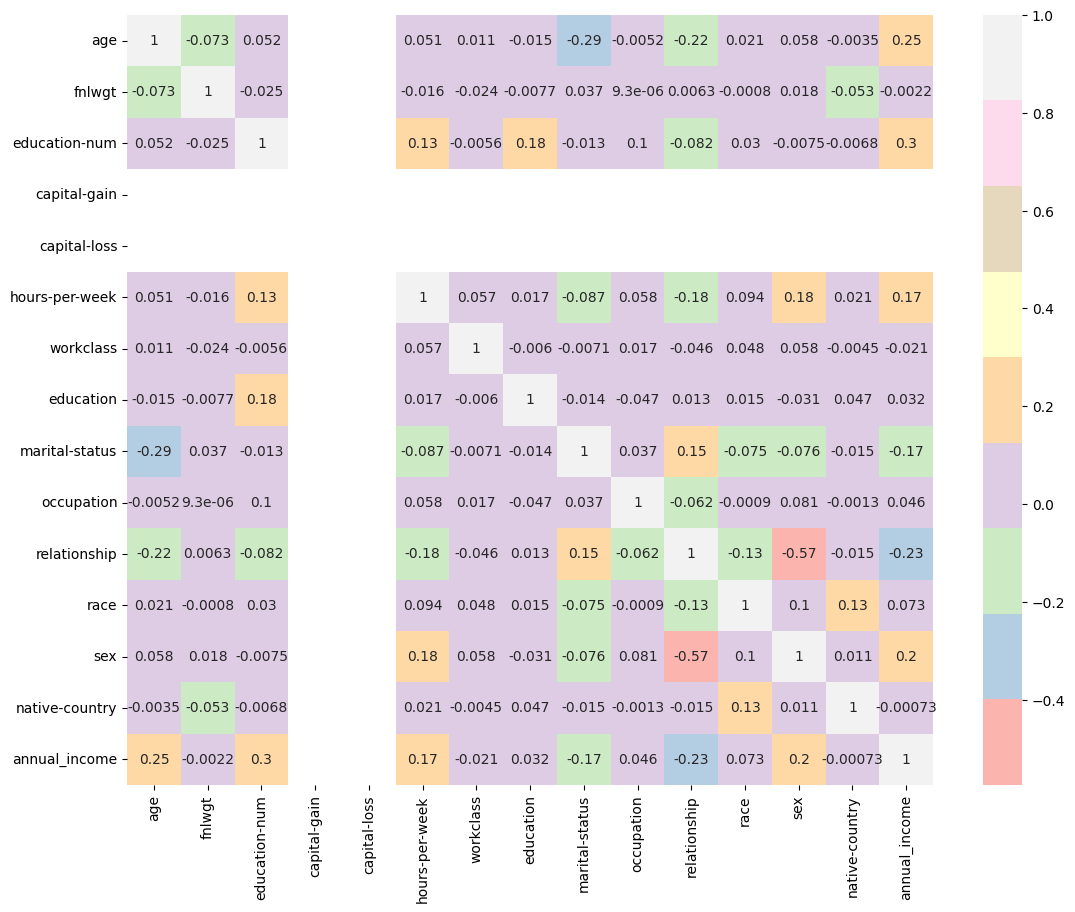

In [204]:
plt.figure(figsize = (13, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Pastel1')

In [205]:
df = df.drop(['capital-gain', 'capital-loss'], axis = 1)

<hr>

# **Step 5 - Model Building**

**Splitting data into target and feature variables**

In [207]:
# feature variables
x = df.drop('annual_income', axis = 1)
# target columns
y = df['annual_income']

**Data split for the model**

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

**Helper function for evaluation**

In [211]:
def helperFunc(actData, predData):
  print('Accuracy Score', accuracy_score(actData, predData))
  print('==================================================')
  print(classification_report(actData, predData))
  print('==================================================')
  print(confusion_matrix(actData, predData))

**Logistic Regression**

In [212]:
# model formulation
model = LogisticRegression()

In [213]:
# data fitting
model.fit(x_train, y_train)

LogisticRegression()

In [214]:
# prediction
pred = model.predict(x_test)

In [215]:
# performance
helperFunc(y_test, pred)

Accuracy Score 0.8023868023868024
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4496
           1       0.56      0.28      0.38      1202

    accuracy                           0.80      5698
   macro avg       0.70      0.61      0.63      5698
weighted avg       0.77      0.80      0.78      5698

[[4230  266]
 [ 860  342]]


**Decision - Tree**

In [216]:
model = DecisionTreeClassifier()

In [217]:
# data fitting
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [218]:
# prediction
pred = model.predict(x_test)

In [219]:
# performance
helperFunc(y_test, pred)

Accuracy Score 0.7767637767637767
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4496
           1       0.47      0.47      0.47      1202

    accuracy                           0.78      5698
   macro avg       0.66      0.67      0.67      5698
weighted avg       0.78      0.78      0.78      5698

[[3858  638]
 [ 634  568]]


**Random-Forest**

In [220]:
model = RandomForestClassifier()

In [221]:
# data fitting
model.fit(x_train, y_train)

RandomForestClassifier()

In [222]:
# prediction
pred = model.predict(x_test)

In [223]:
# performance
helperFunc(y_test, pred)

Accuracy Score 0.8260793260793261
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4496
           1       0.61      0.49      0.54      1202

    accuracy                           0.83      5698
   macro avg       0.74      0.70      0.72      5698
weighted avg       0.81      0.83      0.82      5698

[[4124  372]
 [ 619  583]]


**SVM**

In [226]:
model = SVC()

In [227]:
# data fitting
model.fit(x_train, y_train)

SVC()

In [228]:
# prediction
pred = model.predict(x_test)

In [229]:
# performance
helperFunc(y_test, pred)

Accuracy Score 0.7890487890487891
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4496
           1       0.00      0.00      0.00      1202

    accuracy                           0.79      5698
   macro avg       0.39      0.50      0.44      5698
weighted avg       0.62      0.79      0.70      5698

[[4496    0]
 [1202    0]]


**Naive_bayes**

In [230]:
model = GaussianNB()

In [231]:
# data fitting
model.fit(x_train, y_train)

GaussianNB()

In [232]:
# prediction
pred = model.predict(x_test)

In [233]:
# performance
helperFunc(y_test, pred)

Accuracy Score 0.7839592839592839
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      4496
           1       0.49      0.64      0.56      1202

    accuracy                           0.78      5698
   macro avg       0.69      0.73      0.71      5698
weighted avg       0.81      0.78      0.79      5698

[[3699  797]
 [ 434  768]]
